# Problem Statement


telco data, expected churn rate

classification on retention, clustering of customer behaviour

customer retention program  and the focus 


# Background

Attrition model

innovation reshaping communication

# Data Import

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv
telco = pd.read_csv('../data/telco_churn_data.csv')

#set display max 100
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
#drop lat_long as longitude and latitude col is present
#drop country and states as all data from same location
#drop quarter as all data is in Q3
#drop customer ID 

#drop partner, drop protection plan, drop premium tech support

telco = telco.drop(columns=['country','state','lat_long', 'quarter','customer_id', 'partner', 
                            'device_protection_plan','premium_tech_support', 'churn_label'])

In [4]:
telco.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges_y,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,pop_density
0,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,1,100,5433,Competitor offered more data,No,0,1,None,0.00,DSL,8,No,No,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Competitor,15334
1,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,8,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1,69,5302,Competitor made better offer,Yes,1,8,Offer E,48.85,Fiber Optic,17,No,Yes,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Competitor,17038
2,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1,81,3179,Competitor made better offer,No,0,18,Offer D,11.33,Fiber Optic,52,Yes,Yes,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Competitor,8625
3,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,25,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1,88,5337,Limited range of services,Yes,1,25,Offer C,19.76,Fiber Optic,12,No,Yes,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Dissatisfaction,11799
4,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,37,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,67,2793,Extra data charges,Yes,1,37,Offer C,6.33,Fiber Optic,14,No,Yes,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Price,6947


In [5]:
#columns with Yes/No output to udpate to binary 
columns = ['under_30', 'senior_citizen', 'married', 'dependents',
           'phone_service','paperless_billing','referred_a_friend',
           'streaming_music','unlimited_data','online_security','online_backup', 
           'device_protection','tech_support','streaming_tv','streaming_movies','multiple_lines']

#replacement of values
telco[columns] = telco[columns].replace({'No': 0, 'Yes': 1,'No internet service': 0, 'No phone service':0})
telco['gender'] = telco['gender'].replace({'Male': 0,'Female': 1})

telco['new_user'] = (telco['customer_status'] == 'Joined').astype(int)
 
#target value churned  = 1, stayed = 0, joined = -1
telco['customer_status'] = telco['customer_status'].replace({'Churned': 1,'Stayed': 0, 'Joined':0})

#rename contract to num of months
telco['contract'] = telco['contract'].replace({'Month-to-month': 1, 'Two year': 24, 'One year':12})


In [6]:
#null in churn cat and churn reason
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   int64  
 1   age                                7043 non-null   int64  
 2   under_30                           7043 non-null   int64  
 3   senior_citizen                     7043 non-null   int64  
 4   married                            7043 non-null   int64  
 5   dependents                         7043 non-null   int64  
 6   number_of_dependents               7043 non-null   int64  
 7   city                               7043 non-null   object 
 8   zip_code                           7043 non-null   int64  
 9   latitude                           7043 non-null   float64
 10  longitude                          7043 non-null   float64
 11  tenure_months                      7043 non-null   int64

In [7]:
# managing isnull values as N/A for churn_category and churn_reason
telco.churn_reason = telco.churn_reason.fillna('NA')
telco.churn_category = telco.churn_category.fillna('NA')

In [8]:
#minor rename of total charges for consistency
telco = telco.rename(columns={'total_charges_y':'total_charges'})

In [9]:
telco.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,pop_density,new_user
0,0,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,1,0,0,DSL,0,0,1,0,0,1,1,1,Electronic check,1,100,5433,Competitor offered more data,0,0,1,None,0.00,DSL,8,0,0,39.65,39.65,0.00,20,0.00,59.65,3,1,Competitor,15334,0
1,1,74,0,1,1,1,1,Los Angeles,90063,34.044271,-118.185237,8,1,1,Fiber optic,0,1,0,0,0,0,1,1,Credit card (automatic),1,69,5302,Competitor made better offer,1,1,8,Offer E,48.85,Fiber Optic,17,0,1,80.65,633.30,0.00,0,390.80,1024.10,3,1,Competitor,17038,0
2,0,71,0,1,0,1,3,Los Angeles,90065,34.108833,-118.229715,18,1,1,Fiber optic,0,0,0,0,1,1,1,1,Electronic check,1,81,3179,Competitor made better offer,0,0,18,Offer D,11.33,Fiber Optic,52,1,1,95.45,1752.55,45.61,0,203.94,1910.88,2,1,Competitor,8625,0
3,1,78,0,1,1,1,1,Inglewood,90303,33.936291,-118.332639,25,1,0,Fiber optic,0,1,1,0,1,1,1,1,Electronic check,1,88,5337,Limited range of services,1,1,25,Offer C,19.76,Fiber Optic,12,0,1,98.50,2514.50,13.43,0,494.00,2995.07,2,1,Dissatisfaction,11799,0
4,1,80,0,1,1,1,1,Whittier,90602,33.972119,-118.020188,37,1,1,Fiber optic,0,0,0,0,0,0,1,1,Electronic check,1,67,2793,Extra data charges,1,1,37,Offer C,6.33,Fiber Optic,14,0,1,76.50,2868.15,0.00,0,234.21,3102.36,2,1,Price,6947,0


In [10]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   int64  
 1   age                                7043 non-null   int64  
 2   under_30                           7043 non-null   int64  
 3   senior_citizen                     7043 non-null   int64  
 4   married                            7043 non-null   int64  
 5   dependents                         7043 non-null   int64  
 6   number_of_dependents               7043 non-null   int64  
 7   city                               7043 non-null   object 
 8   zip_code                           7043 non-null   int64  
 9   latitude                           7043 non-null   float64
 10  longitude                          7043 non-null   float64
 11  tenure_months                      7043 non-null   int64

In [11]:
#export regression analysis
telco.to_csv('../data/telco_final.csv',index=False)

## Numerical

In [12]:
telco.customer_status.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: customer_status, dtype: float64

In [13]:
#group numerical columns 
num_tel = telco.select_dtypes(include='number')
#group columns by customer status ( 1: Churn or 0: Stayed ) 
num_tel = num_tel.groupby(by='customer_status').agg('mean')
num_tel

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,churn_value,churn_score,cltv,referred_a_friend,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,pop_density,new_user
customer_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.492656,45.344414,0.212022,0.128721,0.528218,0.293970,0.595284,93518.212215,36.287436,-119.804838,37.569965,0.901044,0.409934,0.333204,0.368380,0.362775,0.335137,0.365868,0.369927,11.100116,0.535562,0.0,50.098183,4490.921337,0.502126,2.468690,37.591225,22.883572,19.915733,0.340162,0.626788,61.265124,2550.792103,2.122279,6.752996,862.952107,3418.374927,3.789911,3506.372826,0.087746
1,0.502408,49.735688,0.162654,0.254682,0.357945,0.056715,0.118245,93532.352595,36.268614,-119.782388,17.979133,0.909042,0.454789,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,2.567683,0.749064,1.0,82.510433,4149.414660,0.333868,0.521134,17.979133,23.167635,22.175495,0.389513,0.803638,74.441332,1531.796094,1.518983,7.158909,433.917549,1971.353569,1.736223,3690.815944,0.000000


In [14]:
#review binary cols
#forlooop

less_one = ['gender', 'under_30', 'senior_citizen', 'married', 'dependents',
       'number_of_dependents', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'referred_a_friend', 'streaming_music',
       'unlimited_data']

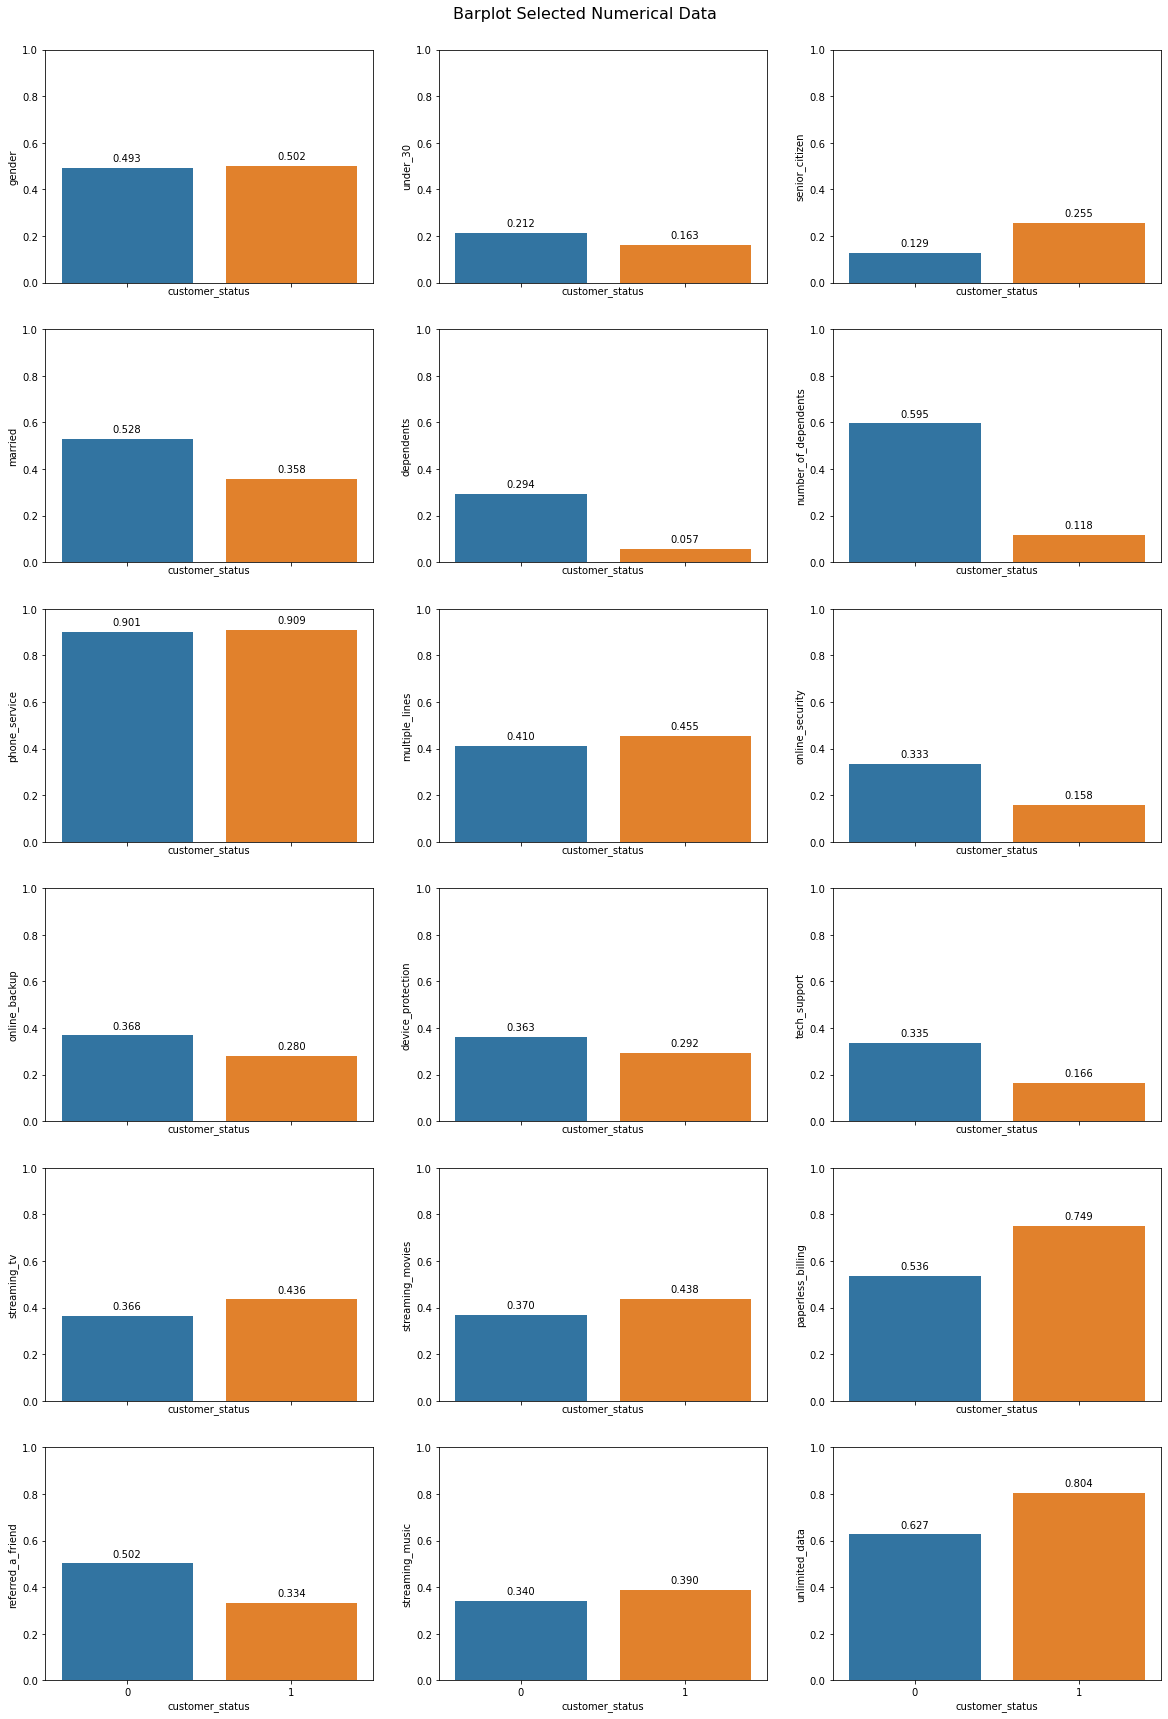

In [15]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20,30), sharex=True)
ax = ax.flatten()

for idx, col in enumerate(less_one):
    graph = sns.barplot(data=num_tel, x=num_tel.index, y=col, ax=ax[idx],)
    ax[idx].set_ylim(ymin=0.0, ymax=1.0)
    
#annotation
    for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.02),
                    ha='center', va='bottom',
                   color= 'black')
        
plt.suptitle(t='Barplot Selected Numerical Data',x=0.5, y = .9, fontsize=16);
# plt.savefig('../images/barplot_numerical')
plt.show()

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
#less than 0.05 (reject null hypothesiss) 
#how gender affect customer status
#how interactio affect customer status

# Null Hypothesis – There is no significant difference among the groups
# Alternate Hypothesis – There is a significant difference among the groups


In [18]:
#perform two-way ANOVA
# for i in less_one:
model = ols('telco.index ~ C(gender) * (C(senior_citizen) + C(under_30))', data=telco[less_one]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(gender),2.805401e+05,1.0,0.114516,0.735070
C(senior_citizen),1.120411e+10,1.0,4573.513074,0.000000
C(under_30),3.903035e+06,1.0,1.593218,0.206909
C(gender):C(senior_citizen),8.394289e+05,1.0,0.342655,0.558320
C(gender):C(under_30),4.199101e+06,1.0,1.714072,0.190501
Residual,1.723911e+10,7037.0,NaN,NaN


In [19]:
#seniors, gender*under30

### Numerical More than 1

In [21]:
#numerical cols larger than 1.0
more_one = num_tel.columns[~num_tel.columns.isin(less_one)]
more_one = more_one.drop(['zip_code','latitude', 'longitude', 'churn_value','new_user','tenure_in_months'])

In [22]:
more_one

Index(['age', 'tenure_months', 'contract', 'churn_score', 'cltv',
       'number_of_referrals', 'avg_monthly_long_distance_charges',
       'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
       'total_refunds', 'total_extra_data_charges',
       'total_long_distance_charges', 'total_revenue', 'satisfaction_score',
       'pop_density'],
      dtype='object')

In [23]:
telco.head()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,city,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_category,pop_density,new_user
0,0,78,0,1,0,0,0,Los Angeles,90022,34.023810,-118.156582,1,0,0,DSL,0,0,1,0,0,1,1,1,Electronic check,1,100,5433,Competitor offered more data,0,0,1,None,0.00,DSL,8,0,0,39.65,39.65,0.00,20,0.00,59.65,3,1,Competitor,15334,0
1,1,74,0,1,1,1,1,Los Angeles,90063,34.044271,-118.185237,8,1,1,Fiber optic,0,1,0,0,0,0,1,1,Credit card (automatic),1,69,5302,Competitor made better offer,1,1,8,Offer E,48.85,Fiber Optic,17,0,1,80.65,633.30,0.00,0,390.80,1024.10,3,1,Competitor,17038,0
2,0,71,0,1,0,1,3,Los Angeles,90065,34.108833,-118.229715,18,1,1,Fiber optic,0,0,0,0,1,1,1,1,Electronic check,1,81,3179,Competitor made better offer,0,0,18,Offer D,11.33,Fiber Optic,52,1,1,95.45,1752.55,45.61,0,203.94,1910.88,2,1,Competitor,8625,0
3,1,78,0,1,1,1,1,Inglewood,90303,33.936291,-118.332639,25,1,0,Fiber optic,0,1,1,0,1,1,1,1,Electronic check,1,88,5337,Limited range of services,1,1,25,Offer C,19.76,Fiber Optic,12,0,1,98.50,2514.50,13.43,0,494.00,2995.07,2,1,Dissatisfaction,11799,0
4,1,80,0,1,1,1,1,Whittier,90602,33.972119,-118.020188,37,1,1,Fiber optic,0,0,0,0,0,0,1,1,Electronic check,1,67,2793,Extra data charges,1,1,37,Offer C,6.33,Fiber Optic,14,0,1,76.50,2868.15,0.00,0,234.21,3102.36,2,1,Price,6947,0


In [24]:
telco.describe()

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,zip_code,latitude,longitude,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,churn_value,churn_score,cltv,referred_a_friend,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,pop_density,new_user
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,46.509726,0.198921,0.162147,0.483033,0.231010,0.468692,93521.964646,36.282441,-119.798880,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,8.835865,0.592219,0.265370,58.699418,4400.295755,0.457476,1.951867,32.386767,22.958954,20.515405,0.353259,0.673719,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,3555.318472,0.064461
std,0.500013,16.750352,0.399217,0.368612,0.499748,0.421508,0.962802,1865.794555,2.455723,2.157889,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,9.551444,0.491457,0.441561,21.525131,1183.057152,0.498224,3.001199,24.542061,15.448113,20.418940,0.478016,0.468885,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,5490.900484,0.245590
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92102.000000,34.030915,-121.815412,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.000000,3469.000000,0.000000,0.000000,9.000000,9.210000,3.000000,0.000000,0.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,55.000000,0.000000
50%,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93552.000000,36.391777,-119.730885,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,61.000000,4527.000000,0.000000,0.000000,29.000000,22.890000,17.000000,0.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,960.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,95351.000000,38.224869,-118.043237,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,75.000000,5380.500000,1.000000,3.000000,55.000000,36.395000,27.000000,1.000000,1.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,5391.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,9.000000,96161.000000,41.962127,-114.192901,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,100.000000,6500.000000,1.000000,11.000000,72.000000,49.990000,85.000000,1.000000,1.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,50983.000000,1.000000


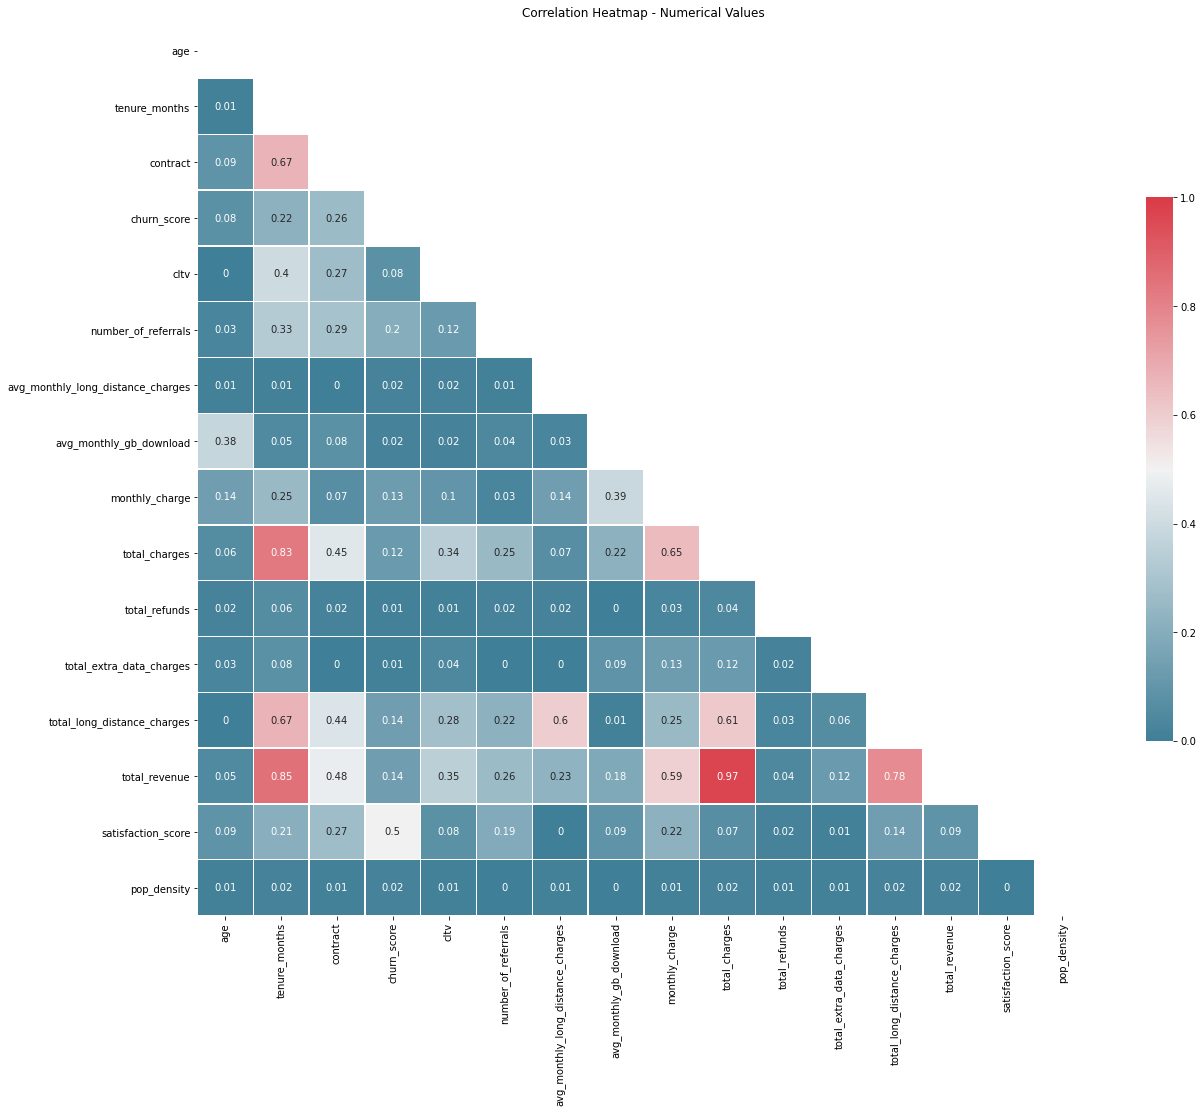

In [25]:
#corr heatmap
plt.figure(figsize=(20,20))

corr=telco[more_one].corr()
# labels = corr.applymap(lambda v: v if v >= 0.8 else '')
cmap = sns.diverging_palette(225,10,as_cmap=True)

sns.heatmap(data=corr.abs().round(2), 
            annot=True, 
            mask= np.triu(np.ones_like(corr, dtype=bool)),
            vmin=0, vmax=1,
            square=True, linewidth=0.5, 
            cmap=cmap ,cbar_kws={'shrink': 0.5})

plt.title('Correlation Heatmap - Numerical Values')
plt.show()

highly correlated tenure_in_months, and tenure_months, total_charges, and total_revenue


<AxesSubplot:xlabel='tenure_months', ylabel='total_charges'>

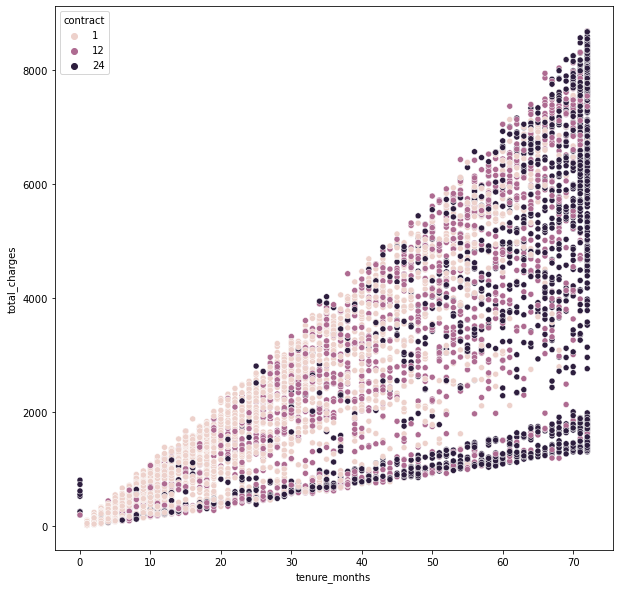

In [60]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=telco, x='tenure_months', y='total_charges', hue='contract')

<AxesSubplot:xlabel='total_revenue', ylabel='total_charges'>

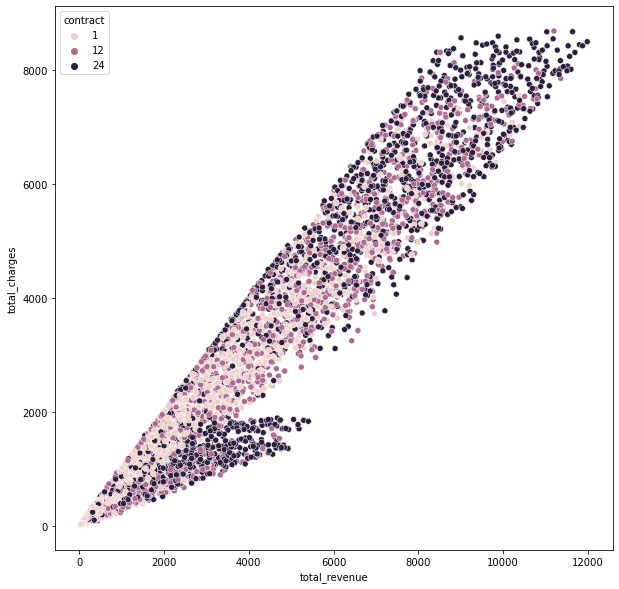

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=telco, x='total_revenue', y='total_charges', hue='contract')

<AxesSubplot:xlabel='churn_score', ylabel='cltv'>

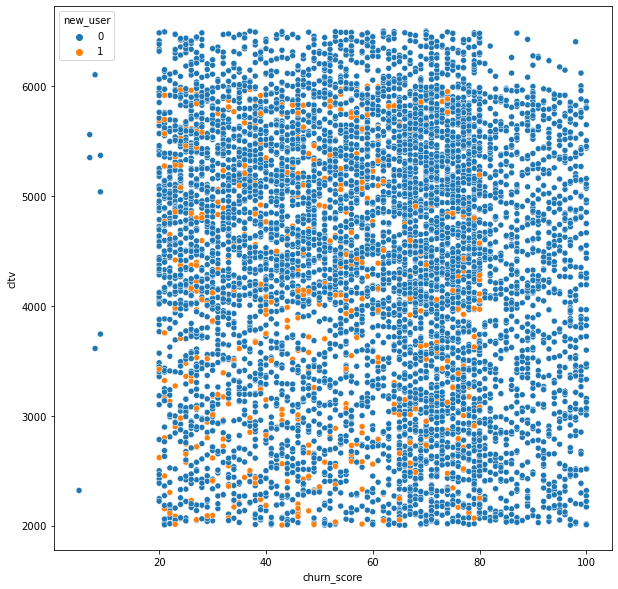

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=telco, x='churn_score', y='cltv', hue='new_user')

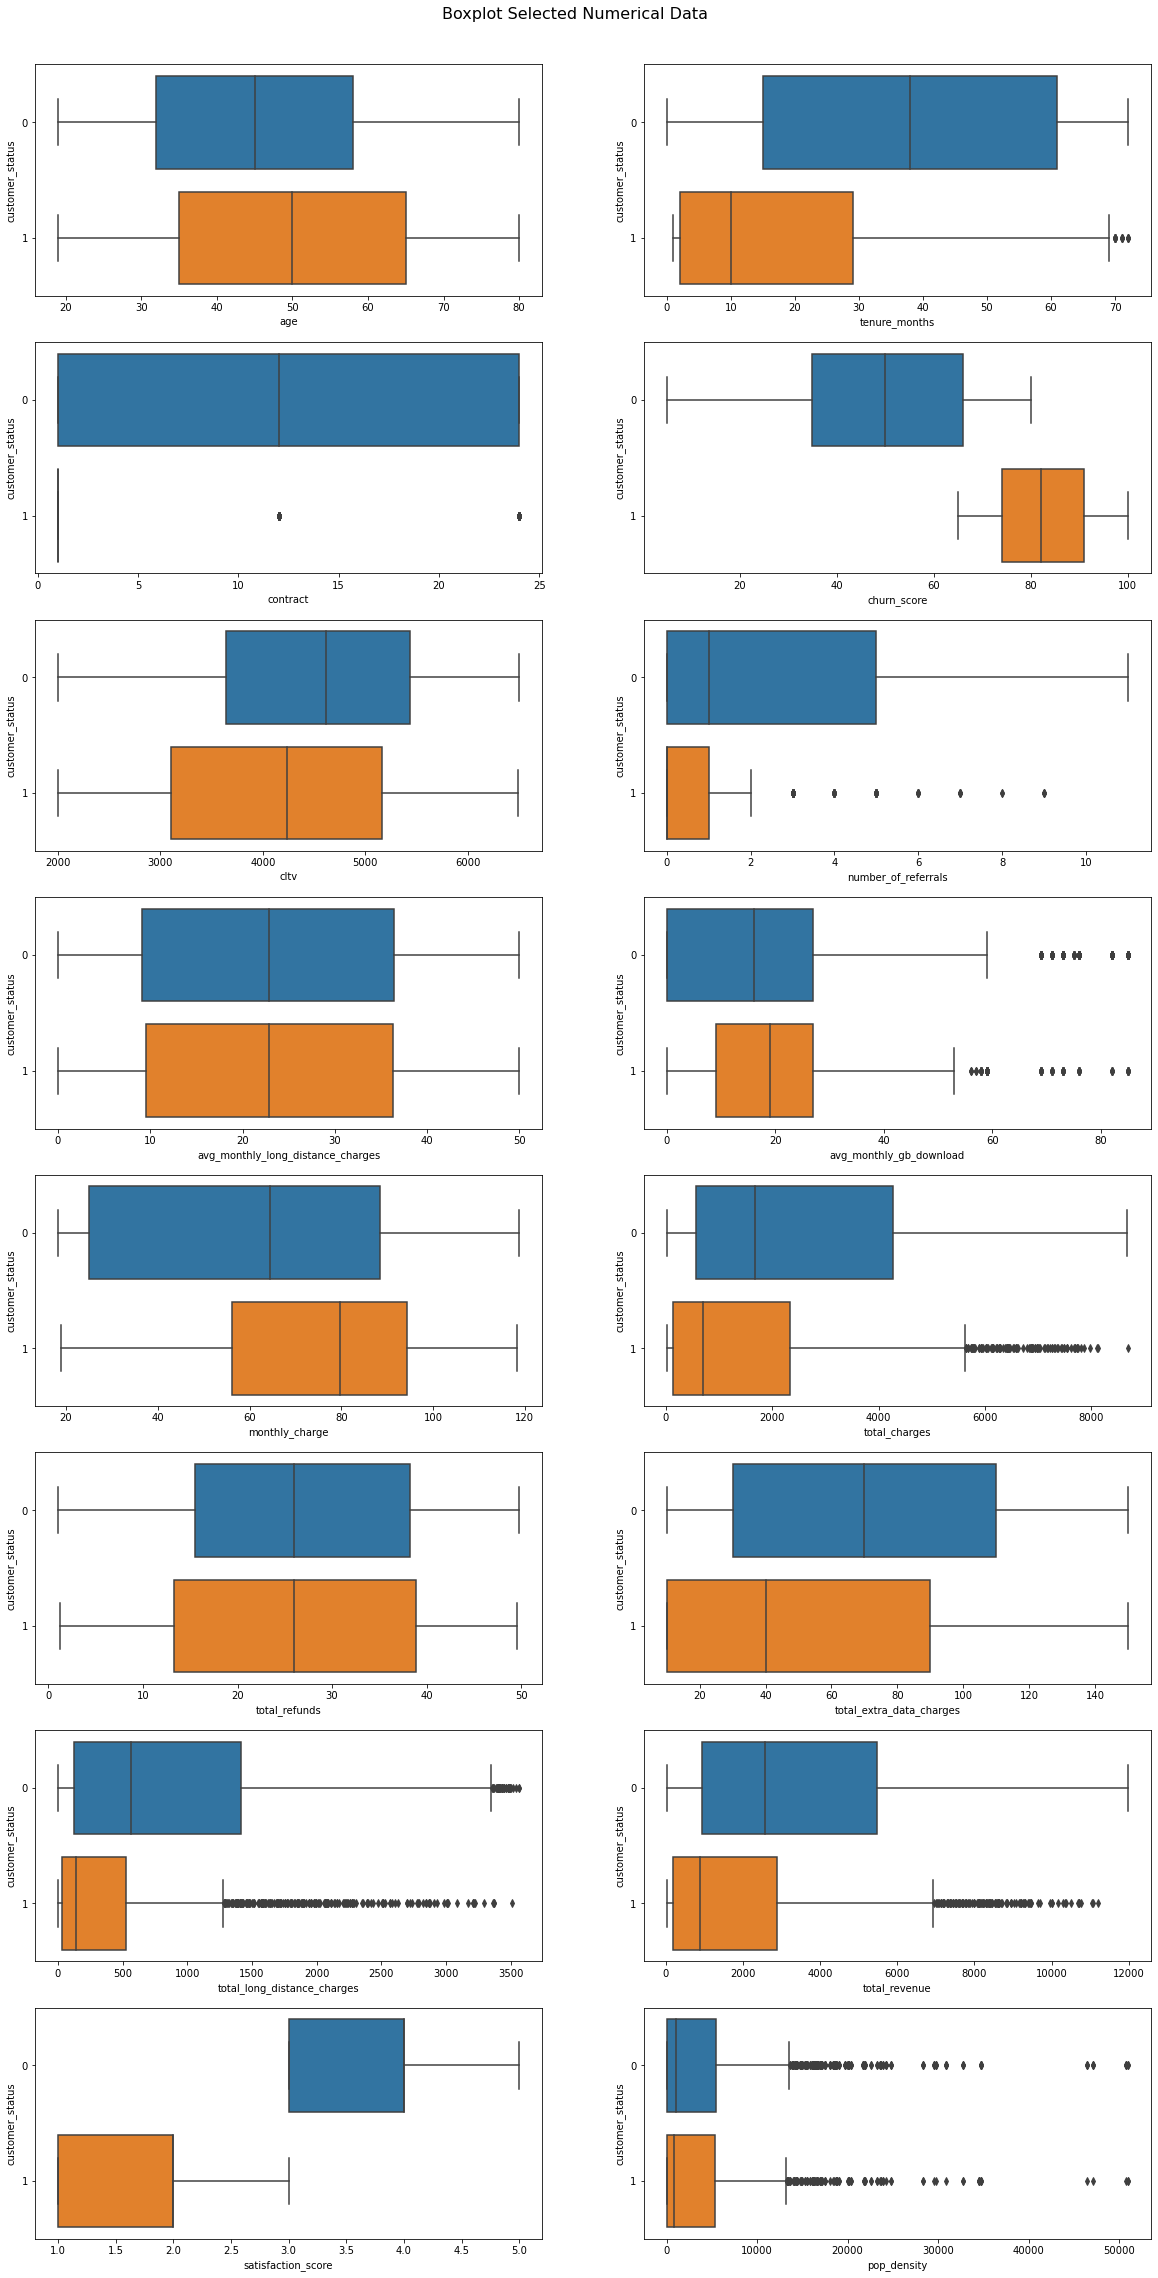

In [26]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(20,40))
ax = ax.flatten()

for idx, col in enumerate(more_one):
    #for refund col removing 0
    if idx == 10:
        sns.boxplot(data=telco[telco['total_refunds']>0], x='total_refunds', y='customer_status', 
                    orient='h', ax=ax[10])
        
    #for extra data charges col removing 0
    elif idx== 11:
        sns.boxplot(data=telco[telco['total_extra_data_charges']>0], x='total_extra_data_charges', 
                    y='customer_status', orient='h', ax=ax[11])
    else:
        sns.boxplot(data=telco, y=telco.customer_status, x=col, ax=ax[idx], orient='h')

plt.suptitle(t='Boxplot Selected Numerical Data',x=0.5, y = .9, fontsize=16);
# plt.savefig('../images/boxplot_numerical')
plt.show()

tenure months  and device protection the same 

### Category

In [27]:
#group categorical columns 
cat_tel = telco.select_dtypes(exclude='number')
#group columns by customer status ( 1: Churn or 0: Stayed ) 
#drop churn statuses and city (too many)
cat_tel = cat_tel.drop(columns=['churn_reason','churn_category', 'city'])

In [28]:
cat_tel

,internet_service,payment_method,offer,internet_type
0,DSL,Electronic check,None,DSL
1,Fiber optic,Credit card (automatic),Offer E,Fiber Optic
2,Fiber optic,Electronic check,Offer D,Fiber Optic
3,Fiber optic,Electronic check,Offer C,Fiber Optic
4,Fiber optic,Electronic check,Offer C,Fiber Optic
...,...,...,...,...
7038,No,Bank transfer (automatic),None,None
7039,DSL,Mailed check,Offer C,Cable
7040,Fiber optic,Credit card (automatic),None,Fiber Optic
7041,DSL,Electronic check,None,DSL


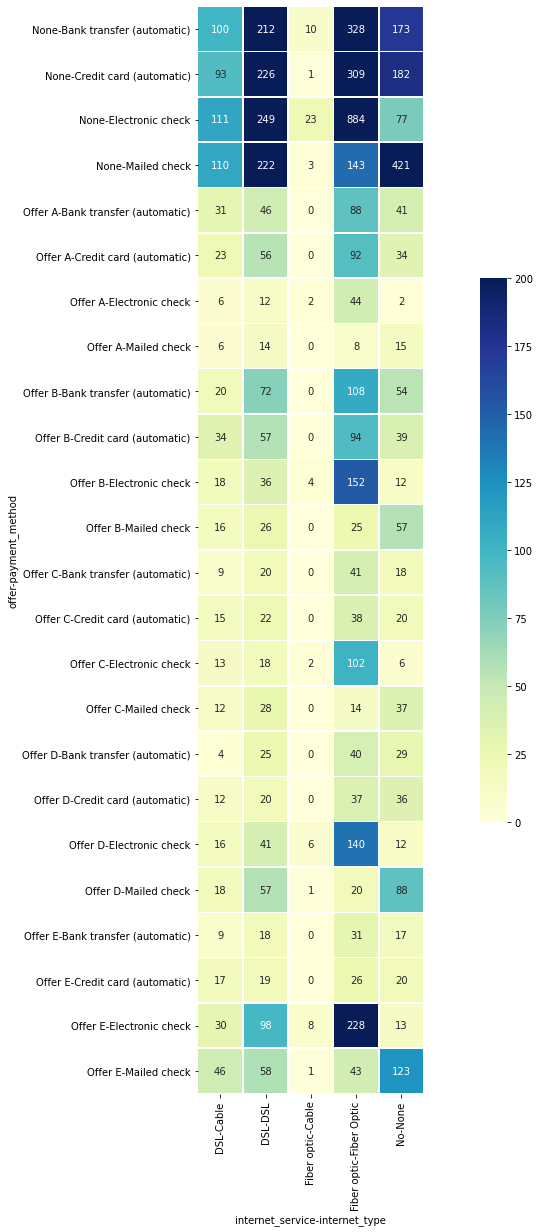

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.crosstab(index=(cat_tel['offer'], cat_tel['payment_method']),
                    columns=(cat_tel['internet_service'], cat_tel['internet_type'])),
            annot=True,
            square=True, 
            fmt='d',
            linewidth=0.5,
            cmap="YlGnBu",cbar_kws={'shrink':0.5}, vmin=0, vmax=200)

plt.show()                               

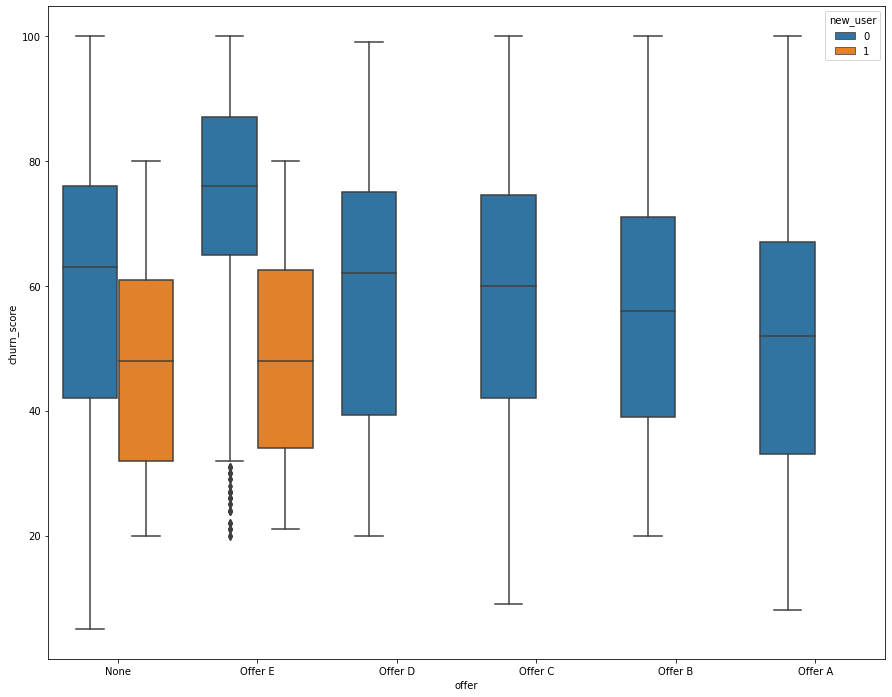

In [65]:
plt.figure(figsize=(15,12))
sns.boxplot(data=telco, x='offer', y='churn_score',hue='new_user')
plt.show()

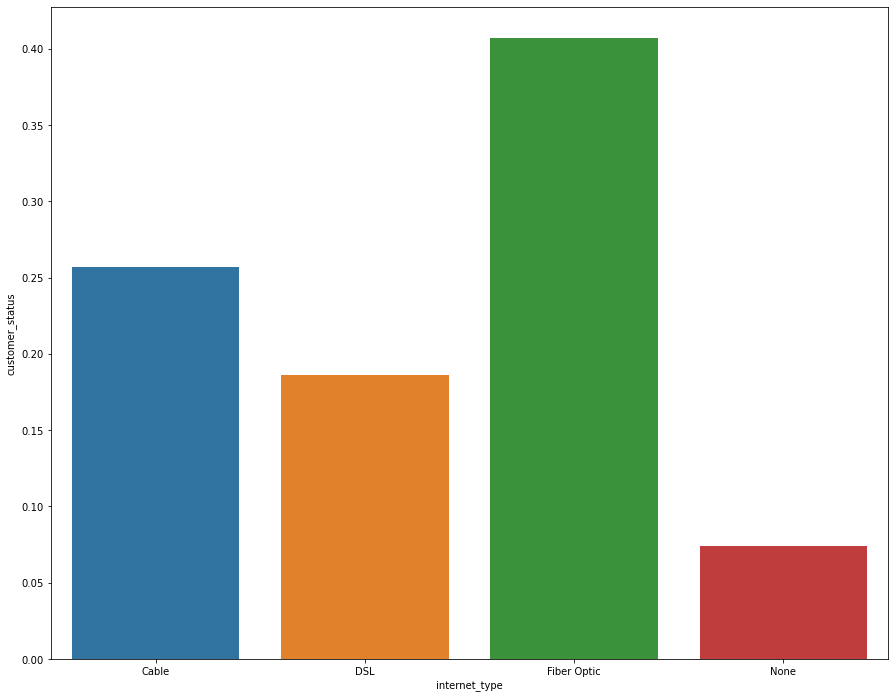

In [31]:
#by churn rate against internet type
plt.figure(figsize=(15,12))
sns.barplot(data=telco.groupby('internet_type').mean()['customer_status'].reset_index(),
            x='internet_type', y='customer_status')
plt.show()

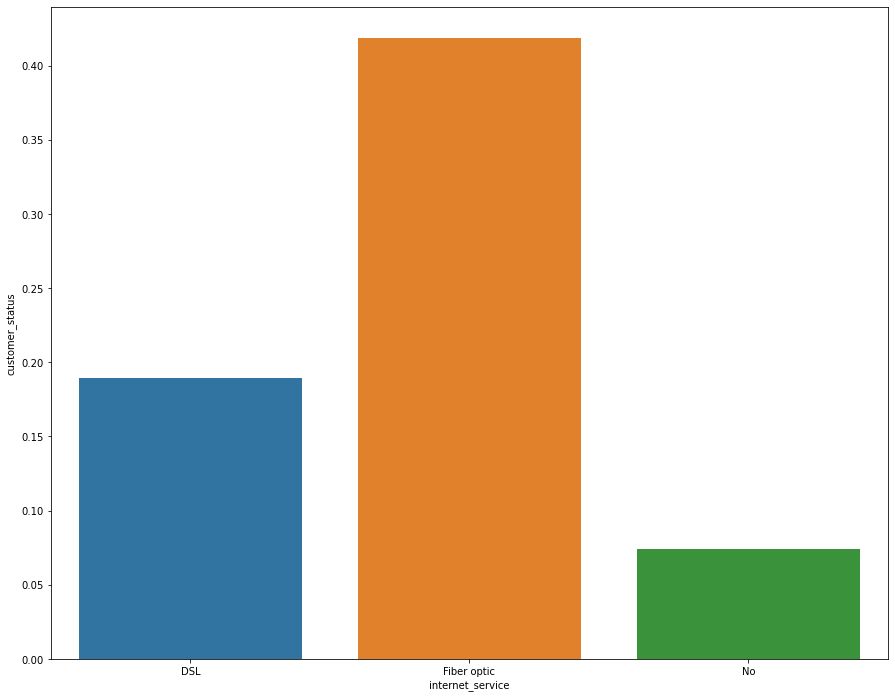

In [32]:
#by churn rate against internet service
plt.figure(figsize=(15,12))
sns.barplot(data=telco.groupby('internet_service').mean()['customer_status'].reset_index(),
            x='internet_service', y='customer_status')
plt.show()

<AxesSubplot:ylabel='Frequency'>

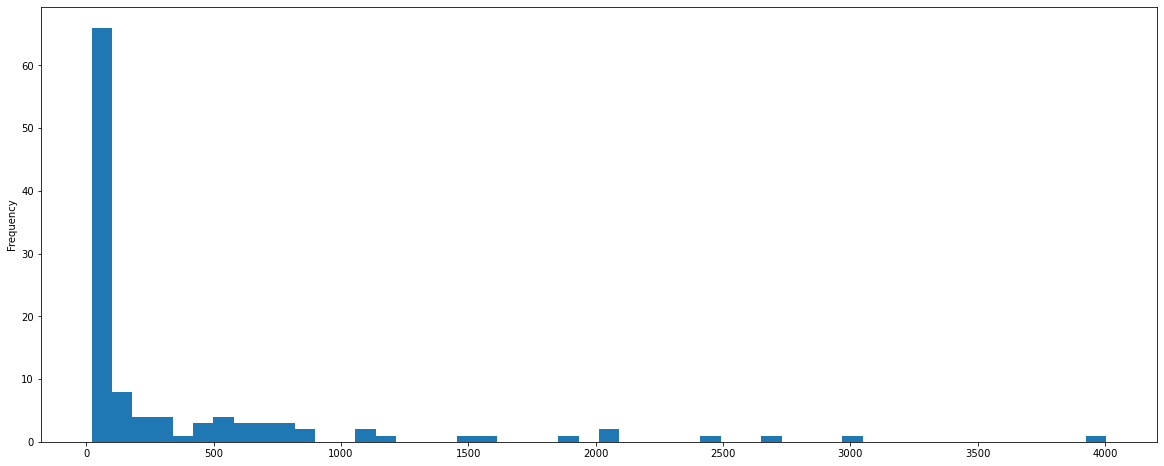

In [33]:
plt.figure(figsize=(20,8))
telco[(telco.internet_service == 'No') & (telco.internet_type == 'None') & (telco.customer_status == 1)].total_revenue.plot(kind='hist', bins=50)

<AxesSubplot:xlabel='tenure_months', ylabel='churn_score'>

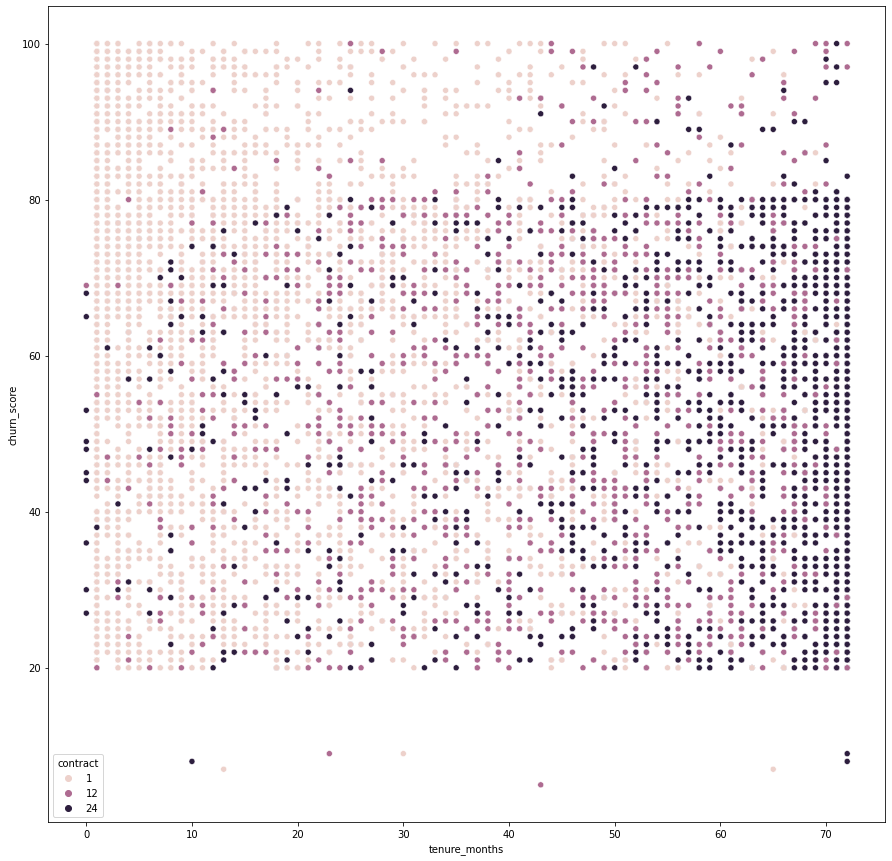

In [55]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=telco, x='tenure_months', y='churn_score', hue='contract')

### Chi Squared Test 

## City

In [34]:
telco_city = telco.groupby('city').mean().drop(columns=['zip_code','latitude','longitude'])

In [35]:
telco_city

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,tenure_months,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,churn_value,churn_score,cltv,referred_a_friend,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,streaming_music,unlimited_data,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,pop_density,new_user
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acampo,0.50,39.000,0.25,0.000,0.75,0.250,0.50,34.250,1.000,0.750,0.25,0.50,0.500,0.500,1.000,1.000,6.500,1.000,0.75,81.250,5254.5,0.750,3.250,34.250,23.85750,26.00,1.000,1.000,103.1125,3705.13750,0.31750,0.0,822.1700,4526.9900,2.000,0.75,126.0,0.0
Acton,0.75,53.500,0.25,0.500,0.75,0.250,0.75,32.500,0.750,0.500,0.50,0.25,0.250,0.500,0.250,0.500,9.500,0.500,0.00,46.750,4711.0,0.500,2.250,32.500,17.84000,29.25,0.500,0.750,69.5250,2458.07500,0.00000,17.5,563.5150,3039.0900,4.250,0.00,111.0,0.0
Adelanto,0.40,42.400,0.20,0.200,0.40,0.400,0.60,37.600,1.000,0.600,0.20,0.20,0.400,0.400,0.400,0.400,7.800,0.800,0.20,69.200,4364.8,0.400,0.800,37.600,31.18000,13.20,0.400,0.600,56.5600,2370.09000,9.64600,0.0,1286.6540,3647.0980,3.600,0.20,192.0,0.0
Adin,0.75,57.500,0.00,0.250,0.25,0.000,0.00,24.250,0.750,0.000,0.00,0.50,0.500,0.000,0.250,0.250,6.750,0.500,0.50,53.250,3990.5,0.250,0.250,24.250,21.82750,14.00,0.000,0.750,57.0250,962.56250,0.00000,0.0,422.2825,1384.8450,2.500,0.50,3.0,0.0
Agoura Hills,0.60,57.000,0.00,0.200,0.60,0.200,0.60,17.200,0.600,0.400,0.40,0.40,0.200,0.200,0.200,0.200,7.800,0.200,0.40,56.000,4507.2,0.400,1.600,17.200,16.13600,17.00,0.200,0.800,48.9900,1495.53000,0.00000,0.0,632.8460,2128.3760,2.800,0.40,748.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yreka,0.75,54.750,0.00,0.000,0.75,0.500,0.50,40.250,0.750,0.500,0.50,0.75,0.500,0.500,0.750,0.500,6.750,0.500,0.00,40.250,4757.5,0.750,3.250,40.250,17.40750,18.25,0.500,0.750,78.9125,3329.63750,0.00000,12.5,1024.7800,4366.9175,3.250,0.00,53.0,0.0
Yuba City,0.50,47.375,0.25,0.125,0.50,0.375,0.75,29.625,0.625,0.375,0.25,0.25,0.375,0.375,0.625,0.625,8.125,0.375,0.25,52.375,4222.0,0.375,2.375,29.625,10.59375,13.00,0.625,0.875,60.9750,1869.14375,15.41375,0.0,379.7475,2233.4775,3.375,0.25,709.5,0.0
Yucaipa,0.75,40.500,0.50,0.250,0.25,0.000,0.00,54.500,1.000,0.750,0.25,0.50,0.250,0.500,1.000,1.000,3.750,1.000,0.25,70.750,5012.5,0.250,0.500,54.500,31.05250,39.50,0.750,1.000,101.6375,5683.67500,0.00000,0.0,1757.7750,7441.4500,3.500,0.25,992.0,0.0


<AxesSubplot:xlabel='pop_density', ylabel='customer_status'>

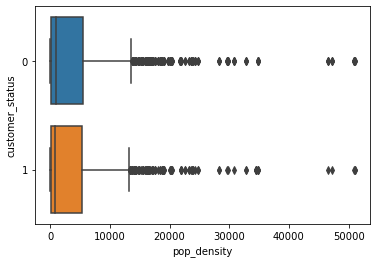

In [36]:
sns.boxplot(data=telco, y=telco.customer_status, x='pop_density', orient='h')

In [37]:
#corr heatma3
# plt.figure(figsize=(20,50))

# sns.heatmap(data=telco_city[less_one],cmap="bone",cbar_kws={'shrink':0.1}, vmin=0, vmax=1)

# plt.title('Correlation Heatmap - City')
# plt.show()

## Churn Reason

In [ ]:
telco.churn_score.unique()

In [ ]:
telco[(telco.customer_status == 1) & (telco.senior_citizen == 1)]['churn_reason'].value_counts()

In [ ]:
telco[(telco.customer_status == 1) & (telco.paperless_billing == 1)]['churn_reason'].value_counts()